In [4]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import emcee

import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from GPErks.gp.data.dataset import Dataset
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import LinearMean
from gpytorch.kernels import RBFKernel, ScaleKernel
from torchmetrics import MeanSquaredError, R2Score
#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion,
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion



%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 7
#set_seed(seed)

In [5]:
def computeResponse(delta,length,time,u,k_0,R):        
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[u[0]*np.ones((Nt,Nx)),u[1]*np.ones((Nt,Nx))]
        c[0,:]=0

        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c

In [6]:
adr=computeResponse([0.002,0.01],10,10,u=[0.01,0.05],k_0=0.01,R=0.1)

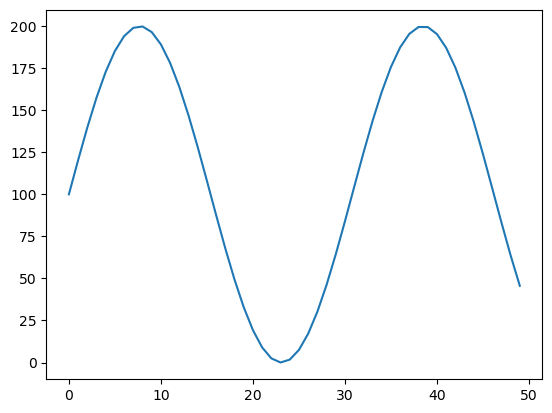

In [7]:
plt.plot(np.sin(np.linspace(0,10,50))*100+100)

In [8]:
x=np.linspace(0,10,int(10/0.01))
t=np.linspace(0,10,int(10/0.002))

Text(0, 0.5, 't')

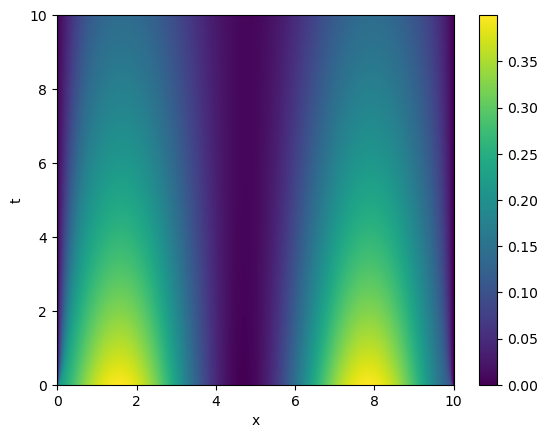

In [9]:
plt.pcolor(x,t,adr)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')

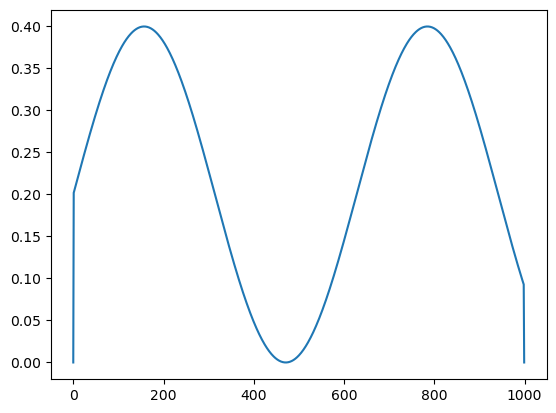

In [10]:
plt.plot(adr[1])

In [11]:
def computeResponse(delta,length,time,latent):       
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[latent[0]*np.ones((Nt,Nx)),latent[0]*np.ones((Nt,Nx))]
        c[0,:]=0
        k_0=latent[1]
        R=latent[2]
        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c
        return c 

In [12]:
import scipy.stats.qmc as qmc

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


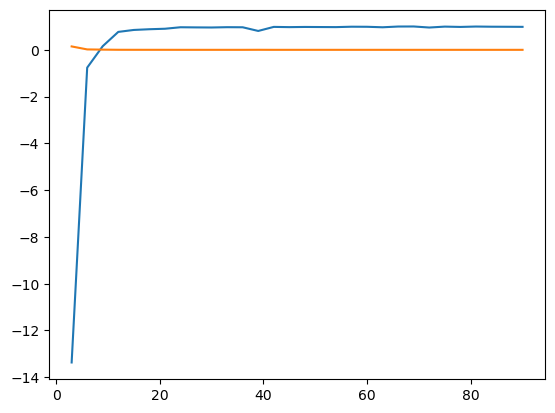

In [13]:
theta_sampler = qmc.LatinHypercube(d=2)
theta_sample = theta_sampler.random(n=500)

l_bounds = [0,0]
u_bounds = [10,10]
theta = qmc.scale(theta_sample, l_bounds, u_bounds)



theta1=(theta/[0.002,0.01]).astype(int)
y=adr[tuple(theta1.T)]


options = np.linspace(0,18)

X=torch.tensor(theta)
y=torch.tensor(y)
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X,
    y,
    test_size=200,
    random_state=seed
)
nt=30
reps = 10
x=np.zeros(nt)
R2=np.zeros(nt)
MSE=np.zeros(nt)
for i in range(nt):
    for k in range(reps):
        # split original dataset in training, validation and testing sets
        X2=X_train_all
        y2=y_train_all
        X_train, X_test2, y_train, y_test2 = train_test_split(
            X2,
            y2,
            train_size=(i+1)*3,
            random_state=seed+i
        )
        x[i]=(i+1)*3
        emulator=GPE.ensemble(X_train,y_train[:,None],mean_func='linear')
        R2[i]+=emulator.R2(X_test,y_test[:,None])/reps
        MSE[i]+=emulator.MSE(X_test,y_test[:,None])/reps

plt.plot(x,R2)

plt.plot(x,MSE)

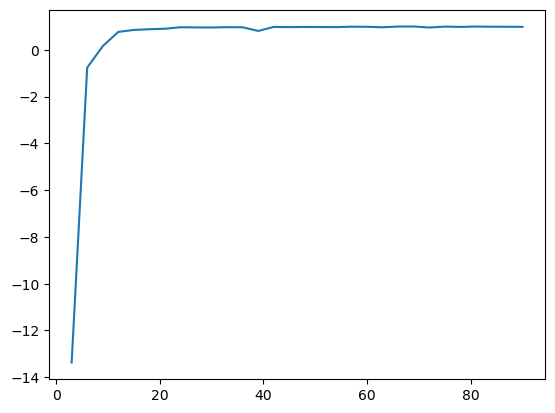

In [14]:

plt.plot(x,R2)



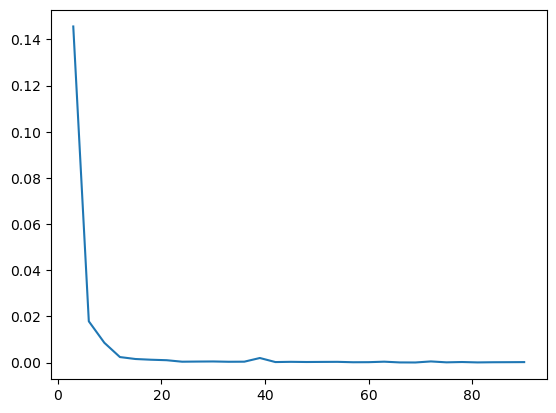

In [15]:
plt.plot(x,MSE)

In [16]:
nsamp=80

In [17]:
theta_sampler = qmc.LatinHypercube(d=2)
theta_sample = theta_sampler.random(n=nsamp)

In [18]:
l_bounds = [0,0]
u_bounds = [10,10]
theta = qmc.scale(theta_sample, l_bounds, u_bounds)

In [19]:
latent_sampler = qmc.LatinHypercube(d=3)
latent_sample = latent_sampler.random(n=18)

In [20]:
l_bounds = [-0.01,0.001,0]
u_bounds = [0.01,0.01,0.5]
latent = qmc.scale(latent_sample, l_bounds, u_bounds)

In [21]:
def computeResponse(delta,length,time,latent):       
        """
        Computes concentrations.
        Arguments:
         source == forcing function (shape: Nt x Nx x Ny). Can either be generated by ... or determine manually.
         enforce_nonnegative = default False,. Setting to true will force concentration to be non-negative each iteration.
        returns array of concentrations (shape: Nt x Nx x Ny), given source. (also saved it in self.concentration)
        """
        #source = self.source
        
        #get the grid step sizes, their squares and the size of the grid
        
        dt = delta[0]
        dx = delta[1]
        dx2 = dx**2
        Nt = int(time/dt)
        Nx = int(length/dx)
        
        source = np.zeros((Nt,Nx))
        source[0,:]=np.sin(np.linspace(0,length,Nx))*100+100
        c=np.zeros((Nt,Nx))
        u=[latent[0]*np.ones((Nt,Nx)),latent[0]*np.ones((Nt,Nx))]
        c[0,:]=0
        k_0=latent[1]
        R=latent[2]
        for i in range(0,Nt-1):
            # Corner BCs 
            c[i+1,0]=0
            c[i+1,Nx-1]=0
            #for k in range(1,Ny-1):
                # Internal Calc
            c[i+1,1:Nx-1]=c[i,1:Nx-1] +dt*(source[i,1:Nx-1]-R*c[i,1:Nx-1]-u[0][i,1:Nx-1]*(c[i,2:Nx]-c[i,0:Nx-2])/(2*dx) +k_0*(c[i,2:Nx]-2*c[i,1:Nx-1]  +c[i,0:Nx-2])/dx2)

        concentration = c 
        
        return c
        return c 

In [22]:
theta

array([[4.91268615e+00, 6.33217607e+00],
       [7.63680250e+00, 4.14965942e+00],
       [9.96518196e+00, 1.72494697e+00],
       [8.97876048e+00, 7.99455346e-01],
       [3.32621127e+00, 7.28753285e+00],
       [1.27371739e+00, 1.41352114e+00],
       [8.49700837e+00, 3.81673930e+00],
       [8.14663199e+00, 2.08329564e-01],
       [7.59501654e+00, 7.53380939e+00],
       [6.20280750e+00, 7.93155023e+00],
       [8.36269721e+00, 4.27575820e+00],
       [4.08274366e+00, 4.94180708e-01],
       [3.69150332e+00, 3.17405701e+00],
       [8.07866617e+00, 3.63821780e+00],
       [7.81660785e+00, 9.99753405e+00],
       [2.35485154e-01, 9.67643716e-01],
       [5.49558316e+00, 5.25687619e+00],
       [9.56174811e+00, 1.35665210e+00],
       [6.78526823e+00, 2.31975094e+00],
       [1.95497160e+00, 7.32607058e-01],
       [3.48059141e+00, 2.74808495e+00],
       [7.30681405e+00, 8.69490647e+00],
       [5.00168577e+00, 7.72707213e+00],
       [2.53502875e+00, 8.23229912e+00],
       [4.274974

In [23]:
latent[0]

array([-0.0060227 ,  0.00533924,  0.02020917])

In [24]:
y = np.zeros(180)
response=computeResponse([0.002,0.01,0.01],10,10,latent[0])
theta1=(theta/[0.002,0.01]).astype(int)
y=response[tuple(theta1.T)]
    

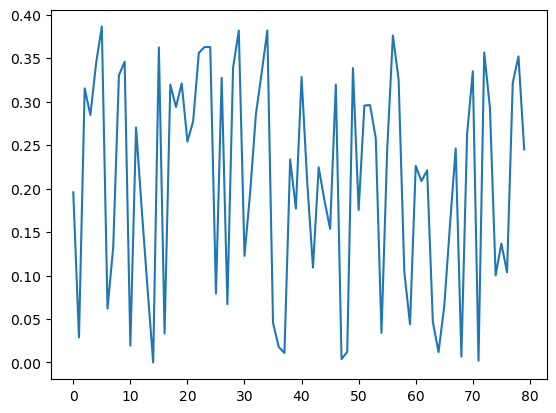

In [25]:
plt.plot(y)

In [26]:
# split original dataset in training, validation and testing sets
X=torch.tensor(theta)
y=torch.tensor(y)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)

In [27]:
emulator=GPE.ensemble(X_train,y_train[:,None],mean_func='linear')

0


In [28]:
emulator.R2(X_test,y_test[:,None])

tensor([0.9959], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [29]:
emulator.predict(X_test)

tensor([[0.2206],
        [0.0484],
        [0.2256],
        [0.3181],
        [0.2078],
        [0.1762],
        [0.0738],
        [0.3598],
        [0.3271],
        [0.3140],
        [0.0107],
        [0.0852],
        [0.1003],
        [0.1230],
        [0.3396],
        [0.0468]], grad_fn=<PermuteBackward0>)

In [30]:
y_test

tensor([0.2210, 0.0179, 0.2261, 0.3195, 0.2060, 0.1758, 0.0670, 0.3622, 0.3282,
        0.3151, 0.0110, 0.0861, 0.1001, 0.1226, 0.3384, 0.0466],
       dtype=torch.float64)

In [31]:
latent

array([[-6.02269505e-03,  5.33923504e-03,  2.02091735e-02],
       [-4.68020366e-03,  9.01705426e-03,  1.35063236e-01],
       [ 6.65263878e-03,  2.77437477e-03,  4.39158904e-01],
       [ 7.72369781e-03,  4.97981539e-03,  4.49201015e-01],
       [ 3.82995349e-03,  7.88053362e-03,  3.34317583e-01],
       [ 9.86674813e-04,  6.22702688e-03,  7.42800851e-02],
       [ 1.69783208e-03,  3.49158944e-03,  3.88341306e-02],
       [-3.27398741e-04,  1.21149034e-03,  2.74834229e-01],
       [ 4.63396064e-03,  5.94025394e-03,  2.96442813e-01],
       [-3.85890445e-03,  4.03651137e-03,  1.77503590e-01],
       [-9.33163433e-03,  7.10000435e-03,  1.07911757e-01],
       [-6.91929537e-03,  8.80169555e-03,  1.40725998e-01],
       [ 9.73004557e-03,  8.28713953e-03,  1.97556447e-01],
       [-8.10075239e-03,  9.72467144e-03,  2.26340176e-01],
       [-2.62123217e-03,  6.72667847e-03,  4.13973539e-01],
       [-1.33114715e-03,  2.15750721e-03,  3.73035402e-01],
       [ 8.44180863e-03,  3.72718310e-03

In [32]:
inputs=[]
for i,l in enumerate(latent):
    theta_sampler = qmc.LatinHypercube(d=2)
    theta_sample = theta_sampler.random(n=nsamp)
    l_bounds = [1,1]
    u_bounds = [9, 9]
    theta = qmc.scale(theta_sample, l_bounds, u_bounds)
    theta = qmc.scale(theta_sample, l_bounds, u_bounds)
    inputs.append(theta)

In [33]:
outputs = []
for i,l in enumerate(latent):
    response = computeResponse([0.002,0.01,0.01],10,10,l)
    theta=(inputs[i]/[0.002,0.01]).astype(int)
    outputs.append(response[tuple(theta.T)])

In [34]:
y_train[:,None].shape

torch.Size([64, 1])

In [35]:
R2_mean = np.zeros((1,len(inputs)) )
R2_std = np.zeros((1,len(inputs))) 
for i in range(len(inputs)):
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(inputs[i]).float()
    y=torch.tensor(outputs[i]).float()
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y[:,None],
        test_size=0.2,
        random_state=seed
    )
    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)
    mean,std=emulator.R2_sample(X_test,y_test,1000)
    R2_mean[:,i]=mean
    R2_std[:,i]=std

0


/Users/pmzcwl/Documents/GitHub/Calibration/GPE_ensemble.py:208: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3618.)
  prediction=torch.stack(prediction).T
/Users/pmzcwl/Documents/GitHub/Calibration/GPE_ensemble.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2_mean = torch.tensor(R2_score.mean(axis=0))
/Users/pmzcwl/Documents/GitHub/Calibration/GPE_ensemble.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone(

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
R2_mean.shape

(1, 18)

In [37]:
R2_mean

array([[0.99978274, 0.99980438, 0.99805105, 0.99860835, 0.99521852,
        0.9997232 , 0.99961078, 0.99837732, 0.99657387, 0.99966955,
        0.99970704, 0.99935263, 0.99902177, 0.99909621, 0.99846262,
        0.99846351, 0.99546862, 0.99918967]])

Text(0, 0.5, '$R^2$')

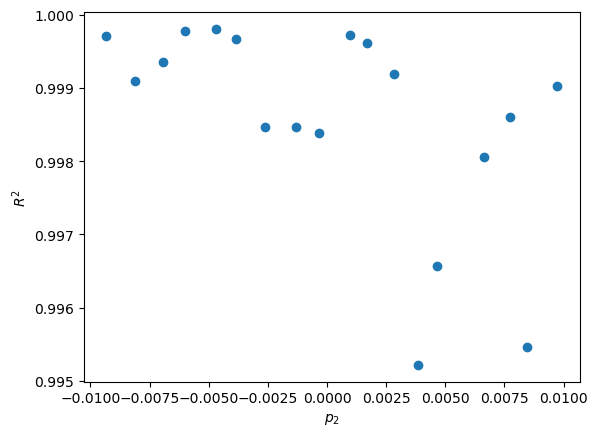

In [38]:
plt.plot(latent[:,0],R2_mean.T,'o')
plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

In [39]:
R2_mean = np.zeros((1,len(inputs)) )
R2_std = np.zeros((1,len(inputs))) 
for i in range(len(inputs)):
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(inputs[i]).float()
    y=torch.tensor(outputs[i]).float()
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y[:,None],
        test_size=0.2,
        random_state=seed
    )
    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)
    mean=emulator.R2(X_test,y_test)
    R2_mean[:,i]=mean.detach().numpy()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Text(0, 0.5, '$R^2$')

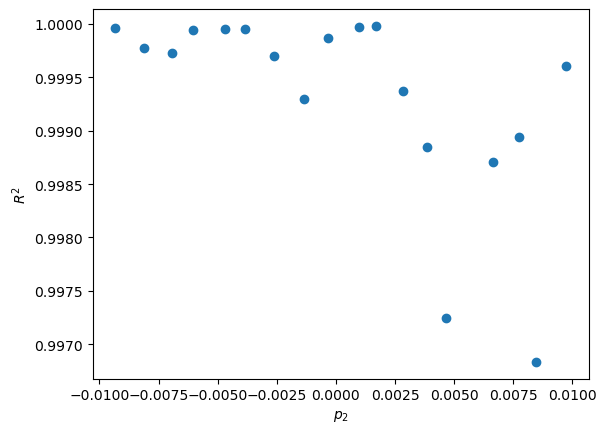

In [40]:
plt.plot(latent[:,0],R2_mean.T,'o')
plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

In [41]:
np.array(inputs[0:17]).shape

(17, 80, 2)

In [42]:
inputs

[array([[4.29243916, 4.33951685],
        [7.85553303, 6.43176208],
        [3.44637861, 3.21402299],
        [2.3687904 , 7.57309682],
        [7.41805362, 3.16084122],
        [7.14822265, 4.00117673],
        [6.66451556, 1.56723513],
        [5.73154769, 8.19068469],
        [5.59128644, 2.53399204],
        [7.71875471, 1.9704217 ],
        [7.56359186, 4.47311866],
        [1.85332983, 8.77992035],
        [3.94386539, 2.42768714],
        [2.59458422, 8.86239931],
        [6.15232597, 2.89007762],
        [6.78746482, 8.39104073],
        [5.9931421 , 1.75494816],
        [6.82546559, 4.26927159],
        [1.69140581, 2.783841  ],
        [7.65879612, 7.00257498],
        [6.39872459, 4.67526585],
        [5.32569399, 7.64838654],
        [5.01416818, 3.56152116],
        [2.7454478 , 6.57181052],
        [2.27356168, 6.24220194],
        [3.85195968, 4.78350297],
        [2.14753954, 8.47925036],
        [3.72304024, 3.81088819],
        [1.74359971, 2.91899221],
        [6.562

In [43]:
large_input = np.array(inputs).reshape(18*nsamp,2)

modeweights = np.repeat(latent,nsamp,axis=0)

large_input = np.concatenate((large_input,modeweights),axis=1)

large_output = np.array(outputs).reshape(18*nsamp,1)

In [44]:
latent

array([[-6.02269505e-03,  5.33923504e-03,  2.02091735e-02],
       [-4.68020366e-03,  9.01705426e-03,  1.35063236e-01],
       [ 6.65263878e-03,  2.77437477e-03,  4.39158904e-01],
       [ 7.72369781e-03,  4.97981539e-03,  4.49201015e-01],
       [ 3.82995349e-03,  7.88053362e-03,  3.34317583e-01],
       [ 9.86674813e-04,  6.22702688e-03,  7.42800851e-02],
       [ 1.69783208e-03,  3.49158944e-03,  3.88341306e-02],
       [-3.27398741e-04,  1.21149034e-03,  2.74834229e-01],
       [ 4.63396064e-03,  5.94025394e-03,  2.96442813e-01],
       [-3.85890445e-03,  4.03651137e-03,  1.77503590e-01],
       [-9.33163433e-03,  7.10000435e-03,  1.07911757e-01],
       [-6.91929537e-03,  8.80169555e-03,  1.40725998e-01],
       [ 9.73004557e-03,  8.28713953e-03,  1.97556447e-01],
       [-8.10075239e-03,  9.72467144e-03,  2.26340176e-01],
       [-2.62123217e-03,  6.72667847e-03,  4.13973539e-01],
       [-1.33114715e-03,  2.15750721e-03,  3.73035402e-01],
       [ 8.44180863e-03,  3.72718310e-03

In [45]:
latent2=latent.copy()
np.delete(latent2,0)

array([ 5.33923504e-03,  2.02091735e-02, -4.68020366e-03,  9.01705426e-03,
        1.35063236e-01,  6.65263878e-03,  2.77437477e-03,  4.39158904e-01,
        7.72369781e-03,  4.97981539e-03,  4.49201015e-01,  3.82995349e-03,
        7.88053362e-03,  3.34317583e-01,  9.86674813e-04,  6.22702688e-03,
        7.42800851e-02,  1.69783208e-03,  3.49158944e-03,  3.88341306e-02,
       -3.27398741e-04,  1.21149034e-03,  2.74834229e-01,  4.63396064e-03,
        5.94025394e-03,  2.96442813e-01, -3.85890445e-03,  4.03651137e-03,
        1.77503590e-01, -9.33163433e-03,  7.10000435e-03,  1.07911757e-01,
       -6.91929537e-03,  8.80169555e-03,  1.40725998e-01,  9.73004557e-03,
        8.28713953e-03,  1.97556447e-01, -8.10075239e-03,  9.72467144e-03,
        2.26340176e-01, -2.62123217e-03,  6.72667847e-03,  4.13973539e-01,
       -1.33114715e-03,  2.15750721e-03,  3.73035402e-01,  8.44180863e-03,
        3.72718310e-03,  3.11589100e-01,  2.81882368e-03,  1.65420005e-03,
        4.98203260e-01])

In [46]:
latent2=latent.copy()
latent2=np.delete(latent2,0,axis=0)

In [47]:
latent2

array([[-4.68020366e-03,  9.01705426e-03,  1.35063236e-01],
       [ 6.65263878e-03,  2.77437477e-03,  4.39158904e-01],
       [ 7.72369781e-03,  4.97981539e-03,  4.49201015e-01],
       [ 3.82995349e-03,  7.88053362e-03,  3.34317583e-01],
       [ 9.86674813e-04,  6.22702688e-03,  7.42800851e-02],
       [ 1.69783208e-03,  3.49158944e-03,  3.88341306e-02],
       [-3.27398741e-04,  1.21149034e-03,  2.74834229e-01],
       [ 4.63396064e-03,  5.94025394e-03,  2.96442813e-01],
       [-3.85890445e-03,  4.03651137e-03,  1.77503590e-01],
       [-9.33163433e-03,  7.10000435e-03,  1.07911757e-01],
       [-6.91929537e-03,  8.80169555e-03,  1.40725998e-01],
       [ 9.73004557e-03,  8.28713953e-03,  1.97556447e-01],
       [-8.10075239e-03,  9.72467144e-03,  2.26340176e-01],
       [-2.62123217e-03,  6.72667847e-03,  4.13973539e-01],
       [-1.33114715e-03,  2.15750721e-03,  3.73035402e-01],
       [ 8.44180863e-03,  3.72718310e-03,  3.11589100e-01],
       [ 2.81882368e-03,  1.65420005e-03

In [48]:
R2_in = torch.zeros((18,1))
R2_out = torch.zeros((18,1))

for i in range(18):
    
    
    
    large_input = np.array(inputs[0:i]+inputs[i+1:18]).reshape(17*nsamp,2)

    latent2=latent.copy()
    latent2=np.delete(latent2,i,axis=0)

    modeweights = np.repeat(latent2,nsamp,axis=0)

    large_input = np.concatenate((large_input,modeweights),axis=1)

    large_output = np.array(outputs[0:i]+outputs[i+1:18]).reshape(17*nsamp,1)
    
    leftout_input=torch.tensor(np.concatenate((inputs[i],np.repeat(latent[[i]],nsamp,axis=0)),axis=1))
    leftout_output=torch.tensor(outputs[i])
    
    # split original dataset in training, validation and testing sets
    X=torch.tensor(large_input)
    y=torch.tensor(large_output)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=720,
        random_state=seed
    )

    emulator=GPE.ensemble(X_train,y_train,mean_func='linear',training_iter=1000)

    R2_in[i]=emulator.R2(X_test,y_test)

    R2_out[i]=emulator.R2(leftout_input,leftout_output[:,None])
    print(R2_out[i])

0
tensor([0.9974], grad_fn=<SelectBackward0>)
0
tensor([1.0000], grad_fn=<SelectBackward0>)
0
tensor([0.9996], grad_fn=<SelectBackward0>)
0
tensor([0.9997], grad_fn=<SelectBackward0>)
0
tensor([0.9999], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9999], grad_fn=<SelectBackward0>)
0
tensor([1.0000], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9999], grad_fn=<SelectBackward0>)
0
tensor([0.9997], grad_fn=<SelectBackward0>)
0
tensor([0.9999], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9998], grad_fn=<SelectBackward0>)
0
tensor([0.9999], grad_fn=<SelectBackward0>)
0
tensor([0.9957], grad_fn=<SelectBackward0>)


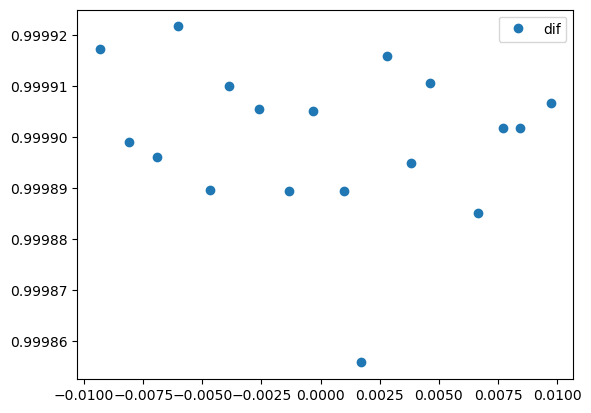

In [49]:
plt.plot(latent[:,0],R2_in.detach().numpy(),'o')
plt.legend(['dif','end','mean'])

Text(0, 0.5, '$R^2$')

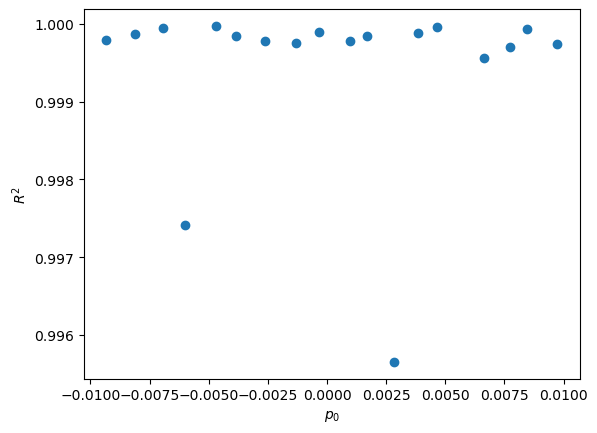

In [50]:
plt.plot(latent[:,0],R2_out[:,0].detach().numpy(),'o')
plt.xlabel('$p_0$')
plt.ylabel('$R^2$')

In [51]:
inputs.copy()

[array([[4.29243916, 4.33951685],
        [7.85553303, 6.43176208],
        [3.44637861, 3.21402299],
        [2.3687904 , 7.57309682],
        [7.41805362, 3.16084122],
        [7.14822265, 4.00117673],
        [6.66451556, 1.56723513],
        [5.73154769, 8.19068469],
        [5.59128644, 2.53399204],
        [7.71875471, 1.9704217 ],
        [7.56359186, 4.47311866],
        [1.85332983, 8.77992035],
        [3.94386539, 2.42768714],
        [2.59458422, 8.86239931],
        [6.15232597, 2.89007762],
        [6.78746482, 8.39104073],
        [5.9931421 , 1.75494816],
        [6.82546559, 4.26927159],
        [1.69140581, 2.783841  ],
        [7.65879612, 7.00257498],
        [6.39872459, 4.67526585],
        [5.32569399, 7.64838654],
        [5.01416818, 3.56152116],
        [2.7454478 , 6.57181052],
        [2.27356168, 6.24220194],
        [3.85195968, 4.78350297],
        [2.14753954, 8.47925036],
        [3.72304024, 3.81088819],
        [1.74359971, 2.91899221],
        [6.562

In [52]:
t_size = 60
reps = 5
MSE = np.zeros((18,17,3))
R2 = np.zeros((18,17,3))
for i in range(18):

    X0 = torch.tensor(inputs[i])
    Y0 = torch.tensor(outputs[i])[:,None]
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)
    
    inputs2 = inputs.copy()
    inputs2.pop(i)
    outputs2 = outputs.copy()
    outputs2.pop(i)
    
    for j in (range(17)):
        inputData_1 = inputs2[j]
        outputData_1 = outputs2[j]

        X1 = torch.tensor(inputData_1)
        Y1 = torch.tensor(outputData_1)[:,None]
        # split original dataset in training, validation and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X1,
            Y1,
            test_size=0.1,
            random_state=seed
        )
        for k in range(reps):
            a=np.random.choice(range(X_train.shape[0]),t_size,replace=False)
            m0 = emulator_0.predict(X_train[a,:])
            y_adjust = torch.tensor(y_train[a] - m0)
            delta_1 = GPE.ensemble(X_train[a,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,j,:] += ((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy()/reps
            R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps



0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_51339/2295128129.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[a] - m0)


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_51339/2295128129.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,j,:] += ((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy()/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_51339/2295128129.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [53]:
latent[:,0]

array([-0.0060227 , -0.0046802 ,  0.00665264,  0.0077237 ,  0.00382995,
        0.00098667,  0.00169783, -0.0003274 ,  0.00463396, -0.0038589 ,
       -0.00933163, -0.0069193 ,  0.00973005, -0.00810075, -0.00262123,
       -0.00133115,  0.00844181,  0.00281882])

In [54]:
R2.mean(axis=1)[:,2]

array([0.99904441, 0.99971517, 0.99984175, 0.9997861 , 0.99987209,
       0.99949543, 0.99911763, 0.99985433, 0.99978286, 0.99971988,
       0.99966757, 0.99967562, 0.99970984, 0.99980919, 0.99967636,
       0.9998787 , 0.9999162 , 0.99975783])

Text(0, 0.5, '$R^2$')

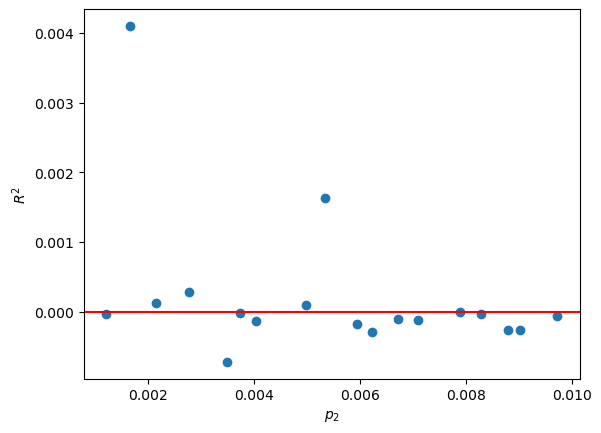

In [55]:
fig, ax = plt.subplots()


#ax.scatter(latent[:,0],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,0],R2.mean(axis=1)[:,1]-R2_out.detach().numpy()[:,1])
ax.scatter(latent[:,1],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,1],R2.mean(axis=1)[:, 0])
plt.axhline(y=0, color='r', linestyle='-')
#ax.scatter(latent[9:,0],R2_out.detach().numpy()[9:,2])

#ax.scatter(latent,R2.mean(axis=1)[:,1])
#ax.scatter(latent,R2_out.detach().numpy()[:,1])

#ax.scatter(latent,R2.mean(axis=1)[:,2])
#ax.scatter(latent,R2_out.detach().numpy()[:,2])

#plt.errorbar(latent,R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


#ax.scatter(latent,R2.mean(axis=1)[:,1])
#plt.errorbar(latent,R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


#ax.scatter(latent,R2.mean(axis=1)[:,2])
#plt.errorbar(latent,R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])



plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

In [56]:
def proxy(a,y_train,m0,output):
    m_t = (m0-y_train.mean(axis=0))/y_train.std(axis=0)
    y_t = (y_train-y_train.mean(axis=0))/y_train.std(axis=0)
    a=torch.tensor(a)
    res = ((a*m_t-y_t)**2).mean(axis=0).detach().numpy()
    return res[output]

def m0_mat(y_test,emulators,x_test,output):

    m0=torch.zeros((y_test.shape[0],len(emulators)))
    for i in range(len(emulators)):
        m0[:,i]=(emulators[i].predict(x_test)[:,output]-y_train.mean(axis=0)[output])/y_train.std(axis=0)[output]


    return m0



In [57]:
import scipy
import time
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

model = Pipeline(steps=[
    #('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=1, include_bias=False,interaction_only=False)),
    ('lasso', LassoCV(n_alphas=1000,max_iter=50000))
])

In [64]:
t_size = 20
reps = 1
MSE = np.zeros((18,1))
R2 = np.zeros((18,1))
emulators=[]
for i in range(18):
    

    X0 = torch.tensor(inputs[i])
    Y0 = torch.tensor(outputs[i])[:,None]
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)
    emulators.append(emulator_0)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [65]:
Xs=inputs

Ys=outputs

In [67]:
reps=1
n=20
R2=torch.zeros(7,1,reps)
ISE=torch.zeros(7,1,reps)
Ti=torch.zeros(7,reps)

for k in range(len(emulators)):
    emulators2=emulators.copy()
    emulators2.pop(k)
    print(len(emulators2))
    X_train, X_test, y_train, y_test = train_test_split(
                torch.tensor(Xs[k]).float(),
                torch.tensor(Ys[k])[:,None].float(),
                test_size=0.1,
                random_state=seed
            )
    for i in range(reps):

        b=np.random.choice(range(X_train.shape[0]),n,replace=False)

#         start = time.time()
#         model_f=GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="linear",training_iter=500)
#         end = time.time()
#         R2[0,:,i]+=model_f.R2(X_test,y_test)/(len(emulators))
#         ISE[0,:,i]+=model_f.ISE(X_test,y_test)/(len(emulators))
        
#         Ti[0,i]+=(end-start)/(len(emulators))

        
#         em=np.random.randint(len(emulators2))
#         start = time.time()
#         model_dc_1 = GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=[emulators2[em]],a=torch.tensor([[1],[1]]))
#         end = time.time()
#         R2[1,:,i]+=model_dc_1.R2(X_test,y_test)/(len(emulators))
#         ISE[1,:,i]+=model_dc_1.ISE(X_test,y_test)/(len(emulators))
#         print(model_dc_1.R2(X_test,y_test))
#         print(R2[1])
        
#         Ti[1,i]+=(end-start)/(len(emulators))

#         start = time.time()
#         m0 = emulators2[0].predict(X_train[b,:])
#         a_d=np.zeros((y_train.shape[1],1))
#         for l in range(y_train.shape[1]):
#             result = scipy.optimize.minimize(proxy, 1, args=(y_train[b,:],m0,l), method='Nelder-Mead', tol=1e-8)
#             print(result.x)
#             a_d[l]=result.x
#         a_d=torch.tensor(a_d)
#         print(a_d)
#         model_dc_reg = GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=[emulators2[em]],a=a_d)
#         end = time.time()
#         R2[2,:,i]+=model_dc_reg.R2(X_test,y_test)/(len(emulators))
#         ISE[2,:,i]+=model_dc_reg.ISE(X_test,y_test)/(len(emulators))
        
#         Ti[2,i]+=(end-start)/(len(emulators))

#         start = time.time()
#         model_dc_learned = GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=[emulators2[em]])
#         end = time.time()
#         R2[3,:,i]+=model_dc_learned.R2(X_test,y_test)/(len(emulators))
#         ISE[3,:,i]+=model_dc_learned.ISE(X_test,y_test)/(len(emulators))
        
#         Ti[3,i]+=(end-start)/(len(emulators))

#         start = time.time()
#         model_dc_all = GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=emulators2)
#         end = time.time()
#         R2[4,:,i]+=model_dc_all.R2(X_test,y_test)/(len(emulators))
#         ISE[4,:,i]+=model_dc_all.ISE(X_test,y_test)/(len(emulators))
        
#         Ti[4,i]+=(end-start)/(len(emulators))

        start = time.time()
        a_d=torch.zeros((y_train.shape[1],len(emulators2)))
        for j in range(y_train.shape[1]):
            m0=m0_mat(y_train[b],emulators2,X_train[b],j)
            # fit to an order-3 polynomial data
            y_t=(y_train[b,j]-y_train.mean(axis=0)[j])/y_train.std(axis=0)[j]
            model = model.fit(m0.detach().numpy(), y_t.detach().numpy())
            a_d[j]=torch.tensor(model.named_steps['lasso'].coef_)
        print(a_d)

        model_dc_lasso=GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=emulators2,a=a_d)
        end = time.time()
        R2[5,:,i]+=model_dc_lasso.R2(X_test,y_test)/(len(emulators))
        ISE[5,:,i]+=model_dc_lasso.ISE(X_test,y_test)/(len(emulators))
        
        Ti[5,i]+=(end-start)/(len(emulators))

        start = time.time()
        model_dc_lasso_learned=GPE.ensemble(X_train[b,:],y_train[b,:],mean_func="discrepancy_cohort",training_iter=500,ref_emulator=emulators2,a=a_d,a_indicator=True)
        end = time.time()
        R2[6,:,i]+=model_dc_lasso_learned.R2(X_test,y_test)/(len(emulators))
        ISE[6,:,i]+=model_dc_lasso_learned.ISE(X_test,y_test)/(len(emulators))
        
        Ti[6,i]+=(end-start)/(len(emulators))
        
    print(R2*(len(emulators)/(k+1)))

17
tensor([[ 0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  1.1136, -0.0000, -0.0000,
         -0.0000,  0.1051,  0.0000, -0.2395, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000]])
0
0
tensor([[[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.8800]],

        [[0.9516]]], grad_fn=<MulBackward0>)
17
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0029, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3757, 0.3991, 0.2308, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
0
0
tensor([[[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.8981]],

        [[0.9199]]], grad_fn=<MulBackward0>)
17
tensor([[-0.0049,  0.0000,  0.2951,  0.1551, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.3981,  0.0000,  0.0000,
          0.1141]])
0
0
tensor([[[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.

In [ ]:

ax.scatter(latent[:,0],R2.mean(axis=1)[:,0])
plt.errorbar(latent[:,0],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])



plt.xlabel('p_0')
plt.ylabel('$R^2$')
#plt.yscale('log')

In [ ]:
def proxy(a,y_train,m0,output):
    a=torch.tensor(a)
    res = ((a*m0-y_train)**2).mean(axis=1).detach().numpy()
    return res[output]

In [ ]:
import scipy

In [ ]:
m0 = emulator_0.predict(X_train)

In [60]:
(y_train**2).mean()

tensor(0.0045, dtype=torch.float64)

In [61]:
result = scipy.optimize.minimize(proxy, 1, args=(y_train,m0,0), method='Nelder-Mead', tol=1e-8)

In [62]:
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.2686090046813446e-22
             x: [ 2.179e-01]
           nit: 30
          nfev: 60
 final_simplex: (array([[ 2.179e-01],
                       [ 2.179e-01]]), array([ 1.269e-22,  1.270e-22]))

In [63]:
proxy(result.x,y_train,m0,0)

1.2686090046813446e-22

In [64]:
X0 = torch.tensor(inputs[0])
Y0 = torch.tensor(outputs[0])[:,None]
emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)

0


In [65]:
t_size = 60
reps = 5
MSE = np.zeros((18,17,3))
R2 = np.zeros((18,17,3))
for i in range(18):

    X0 = torch.tensor(inputs[i])
    Y0 = torch.tensor(outputs[i])[:,None]
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)
    
    inputs2 = inputs.copy()
    inputs2.pop(i)
    outputs2 = outputs.copy()
    outputs2.pop(i)
    
    for j in (range(17)):
        inputData_1 = inputs2[j]
        outputData_1 = outputs2[j]

        X1 = torch.tensor(inputData_1)
        Y1 = torch.tensor(outputData_1)[:,None]
        # split original dataset in training, validation and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X1,
            Y1,
            test_size=0.1,
            random_state=seed
        )
        for k in range(reps):
            a=np.random.choice(range(X_train.shape[0]),t_size,replace=False)
            m0 = emulator_0.predict(X_train[a,:])
            a_d=np.zeros(y_train.shape[1])
            for l in range(y_train.shape[1]):
                result = scipy.optimize.minimize(proxy, 1, args=(y_train[a,:],m0,l), method='Nelder-Mead', tol=1e-8)
                print(result.x)
                a_d[l]=result.x

            a_d=torch.tensor(a_d)
            print(a_d)
            
            y_adjust = torch.tensor(y_train[a] - a_d*m0)
            delta_1 = GPE.ensemble(X_train[a,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,j,:] += ((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy()/reps
            R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps



0
[2.81205561]
tensor([2.8121], dtype=torch.float64)
0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3653863174.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[a] - a_d*m0)
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3653863174.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,j,:] += ((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy()/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3653863174.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(s

[7.61781808]
tensor([7.6178], dtype=torch.float64)
0
[3.59310153]
tensor([3.5931], dtype=torch.float64)
0
[2.81168013]
tensor([2.8117], dtype=torch.float64)
0
[7.59787676]
tensor([7.5979], dtype=torch.float64)
0
[0.9472101]
tensor([0.9472], dtype=torch.float64)
0
[0.87737561]
tensor([0.8774], dtype=torch.float64)
0
[0.98117511]
tensor([0.9812], dtype=torch.float64)
0
[0.88868865]
tensor([0.8887], dtype=torch.float64)
0
[0.89635871]
tensor([0.8964], dtype=torch.float64)
0
[2.28837031]
tensor([2.2884], dtype=torch.float64)
0
[9.99203337]
tensor([9.9920], dtype=torch.float64)
0
[4.05329298]
tensor([4.0533], dtype=torch.float64)
0
[2.14270531]
tensor([2.1427], dtype=torch.float64)
0
[1.59399199]
tensor([1.5940], dtype=torch.float64)
0
[8.23704974]
tensor([8.2370], dtype=torch.float64)
0
[13.62852124]
tensor([13.6285], dtype=torch.float64)
0
[3.15374371]
tensor([3.1537], dtype=torch.float64)
0
[7.35037822]
tensor([7.3504], dtype=torch.float64)
0
[2.00066849]
tensor([2.0007], dtype=torch.flo

[0.90250703]
tensor([0.9025], dtype=torch.float64)
0
[0.5200904]
tensor([0.5201], dtype=torch.float64)
0
[0.71038828]
tensor([0.7104], dtype=torch.float64)
0
[0.66847664]
tensor([0.6685], dtype=torch.float64)
0
[0.12131544]
tensor([0.1213], dtype=torch.float64)
0
[0.58567358]
tensor([0.5857], dtype=torch.float64)
0
[0.1848662]
tensor([0.1849], dtype=torch.float64)
0
[0.67395444]
tensor([0.6740], dtype=torch.float64)
0
[0.11115984]
tensor([0.1112], dtype=torch.float64)
0
[1.05380613]
tensor([1.0538], dtype=torch.float64)
0
[0.39068339]
tensor([0.3907], dtype=torch.float64)
0
[0.86440425]
tensor([0.8644], dtype=torch.float64)
0
[0.73375329]
tensor([0.7338], dtype=torch.float64)
0
[0.48870271]
tensor([0.4887], dtype=torch.float64)
0
0
[1.03714246]
tensor([1.0371], dtype=torch.float64)
0
[1.01295922]
tensor([1.0130], dtype=torch.float64)
0
[1.09573489]
tensor([1.0957], dtype=torch.float64)
0
[1.10295962]
tensor([1.1030], dtype=torch.float64)
0
[1.06654678]
tensor([1.0665], dtype=torch.floa

[0.44339476]
tensor([0.4434], dtype=torch.float64)
0
[0.53742562]
tensor([0.5374], dtype=torch.float64)
0
[0.43533784]
tensor([0.4353], dtype=torch.float64)
0
[0.32654399]
tensor([0.3265], dtype=torch.float64)
0
[0.50438296]
tensor([0.5044], dtype=torch.float64)
0
[0.47960726]
tensor([0.4796], dtype=torch.float64)
0
[0.1948076]
tensor([0.1948], dtype=torch.float64)
0
[0.25516485]
tensor([0.2552], dtype=torch.float64)
0
[0.31441408]
tensor([0.3144], dtype=torch.float64)
0
[0.25329241]
tensor([0.2533], dtype=torch.float64)
0
[0.0763585]
tensor([0.0764], dtype=torch.float64)
0
[0.5325897]
tensor([0.5326], dtype=torch.float64)
0
[0.69753375]
tensor([0.6975], dtype=torch.float64)
0
[0.19525595]
tensor([0.1953], dtype=torch.float64)
0
[0.38042611]
tensor([0.3804], dtype=torch.float64)
0
[0.29135346]
tensor([0.2914], dtype=torch.float64)
0
[0.60508254]
tensor([0.6051], dtype=torch.float64)
0
[0.76985577]
tensor([0.7699], dtype=torch.float64)
0
[0.27207623]
tensor([0.2721], dtype=torch.float64

[0.21439015]
tensor([0.2144], dtype=torch.float64)
0
[0.18634869]
tensor([0.1863], dtype=torch.float64)
0
[0.56365655]
tensor([0.5637], dtype=torch.float64)
0
[0.13918959]
tensor([0.1392], dtype=torch.float64)
0
[1.82700921]
tensor([1.8270], dtype=torch.float64)
0
[1.82756737]
tensor([1.8276], dtype=torch.float64)
0
[1.13710124]
tensor([1.1371], dtype=torch.float64)
0
[1.37530387]
tensor([1.3753], dtype=torch.float64)
0
[1.13673186]
tensor([1.1367], dtype=torch.float64)
0
[0.76684291]
tensor([0.7668], dtype=torch.float64)
0
[0.45806189]
tensor([0.4581], dtype=torch.float64)
0
[0.61087383]
tensor([0.6109], dtype=torch.float64)
0
[0.38385625]
tensor([0.3839], dtype=torch.float64)
0
[0.65582755]
tensor([0.6558], dtype=torch.float64)
0
[0.50882246]
tensor([0.5088], dtype=torch.float64)
0
[0.3705251]
tensor([0.3705], dtype=torch.float64)
0
[0.68680056]
tensor([0.6868], dtype=torch.float64)
0
[0.51373207]
tensor([0.5137], dtype=torch.float64)
0
[0.44368036]
tensor([0.4437], dtype=torch.float

[1.54184278]
tensor([1.5418], dtype=torch.float64)
0
[1.46016343]
tensor([1.4602], dtype=torch.float64)
0
[1.16043933]
tensor([1.1604], dtype=torch.float64)
0
[1.16397309]
tensor([1.1640], dtype=torch.float64)
0
[0.14993042]
tensor([0.1499], dtype=torch.float64)
0
[0.27894014]
tensor([0.2789], dtype=torch.float64)
0
[0.64953839]
tensor([0.6495], dtype=torch.float64)
0
[0.36906394]
tensor([0.3691], dtype=torch.float64)
0
[0.14628907]
tensor([0.1463], dtype=torch.float64)
0
[3.08834726]
tensor([3.0883], dtype=torch.float64)
0
[2.27923172]
tensor([2.2792], dtype=torch.float64)
0
[1.80108308]
tensor([1.8011], dtype=torch.float64)
0
[1.30683812]
tensor([1.3068], dtype=torch.float64)
0
[1.33630785]
tensor([1.3363], dtype=torch.float64)
0
[0.71044455]
tensor([0.7104], dtype=torch.float64)
0
[0.52829282]
tensor([0.5283], dtype=torch.float64)
0
[0.48446289]
tensor([0.4845], dtype=torch.float64)
0
[0.53799608]
tensor([0.5380], dtype=torch.float64)
0
[0.71032803]
tensor([0.7103], dtype=torch.floa

[1.12259001]
tensor([1.1226], dtype=torch.float64)
0
[1.136498]
tensor([1.1365], dtype=torch.float64)
0
[1.12275913]
tensor([1.1228], dtype=torch.float64)
0
[1.04666543]
tensor([1.0467], dtype=torch.float64)
0
[28.29529601]
tensor([28.2953], dtype=torch.float64)
0
[11.54548041]
tensor([11.5455], dtype=torch.float64)
0
[10.41314775]
tensor([10.4131], dtype=torch.float64)
0
[10.61796274]
tensor([10.6180], dtype=torch.float64)
0
[10.61796274]
tensor([10.6180], dtype=torch.float64)
0
[1.82363804]
tensor([1.8236], dtype=torch.float64)
0
[18.08270622]
tensor([18.0827], dtype=torch.float64)
0
[2.05137165]
tensor([2.0514], dtype=torch.float64)
0
[1.81164291]
tensor([1.8116], dtype=torch.float64)
0
[22.79491308]
tensor([22.7949], dtype=torch.float64)
0
[2.19187649]
tensor([2.1919], dtype=torch.float64)
0
[1.98156535]
tensor([1.9816], dtype=torch.float64)
0
[2.65231013]
tensor([2.6523], dtype=torch.float64)
0
[2.27638208]
tensor([2.2764], dtype=torch.float64)
0
[5.26671638]
tensor([5.2667], dtyp

[0.54319274]
tensor([0.5432], dtype=torch.float64)
0
[0.74297006]
tensor([0.7430], dtype=torch.float64)
0
[0.66148658]
tensor([0.6615], dtype=torch.float64)
0
[0.82192972]
tensor([0.8219], dtype=torch.float64)
0
0
[0.79577073]
tensor([0.7958], dtype=torch.float64)
0
[0.47741404]
tensor([0.4774], dtype=torch.float64)
0
[0.77969515]
tensor([0.7797], dtype=torch.float64)
0
[0.4693682]
tensor([0.4694], dtype=torch.float64)
0
[0.82216885]
tensor([0.8222], dtype=torch.float64)
0
[2.43617382]
tensor([2.4362], dtype=torch.float64)
0
[4.88942521]
tensor([4.8894], dtype=torch.float64)
0
[1.16367348]
tensor([1.1637], dtype=torch.float64)
0
[2.55205989]
tensor([2.5521], dtype=torch.float64)
0
[5.09032226]
tensor([5.0903], dtype=torch.float64)
0
[0.4502701]
tensor([0.4503], dtype=torch.float64)
0
[0.4987914]
tensor([0.4988], dtype=torch.float64)
0
[0.7798933]
tensor([0.7799], dtype=torch.float64)
0
[0.63149835]
tensor([0.6315], dtype=torch.float64)
0
[0.55641287]
tensor([0.5564], dtype=torch.float6

[0.89618122]
tensor([0.8962], dtype=torch.float64)
0
[0.94034285]
tensor([0.9403], dtype=torch.float64)
0
[0.85569207]
tensor([0.8557], dtype=torch.float64)
0
[0.94019161]
tensor([0.9402], dtype=torch.float64)
0
[1.69739382]
tensor([1.6974], dtype=torch.float64)
0
[3.13232284]
tensor([3.1323], dtype=torch.float64)
0
[2.6985957]
tensor([2.6986], dtype=torch.float64)
0
[1.26079676]
tensor([1.2608], dtype=torch.float64)
0
[5.04111829]
tensor([5.0411], dtype=torch.float64)
0
[0.57415721]
tensor([0.5742], dtype=torch.float64)
0
[0.36122687]
tensor([0.3612], dtype=torch.float64)
0
[0.80410234]
tensor([0.8041], dtype=torch.float64)
0
[1.02798525]
tensor([1.0280], dtype=torch.float64)
0
[0.407145]
tensor([0.4071], dtype=torch.float64)
0
[1.86583729]
tensor([1.8658], dtype=torch.float64)
0
[2.15219299]
tensor([2.1522], dtype=torch.float64)
0
[1.81820536]
tensor([1.8182], dtype=torch.float64)
0
[1.73950053]
tensor([1.7395], dtype=torch.float64)
0
[2.96205455]
tensor([2.9621], dtype=torch.float64

[2.24656352]
tensor([2.2466], dtype=torch.float64)
0
[1.62659483]
tensor([1.6266], dtype=torch.float64)
0
[1.48426444]
tensor([1.4843], dtype=torch.float64)
0
[5.44693094]
tensor([5.4469], dtype=torch.float64)
0
[1.15570777]
tensor([1.1557], dtype=torch.float64)
0
[1.19343206]
tensor([1.1934], dtype=torch.float64)
0
[1.47866738]
tensor([1.4787], dtype=torch.float64)
0
[1.06720946]
tensor([1.0672], dtype=torch.float64)
0
[1.21276708]
tensor([1.2128], dtype=torch.float64)
0
[1.0456649]
tensor([1.0457], dtype=torch.float64)
0
[1.09592251]
tensor([1.0959], dtype=torch.float64)
0
[1.09806988]
tensor([1.0981], dtype=torch.float64)
0
[1.01089469]
tensor([1.0109], dtype=torch.float64)
0
[1.12728436]
tensor([1.1273], dtype=torch.float64)
0
[1.69596422]
tensor([1.6960], dtype=torch.float64)
0
[2.34298956]
tensor([2.3430], dtype=torch.float64)
0
[0.76632955]
tensor([0.7663], dtype=torch.float64)
0
[1.90667193]
tensor([1.9067], dtype=torch.float64)
0
[1.53597555]
tensor([1.5360], dtype=torch.float

[1.87279003]
tensor([1.8728], dtype=torch.float64)
0
[3.7694032]
tensor([3.7694], dtype=torch.float64)
0
[7.59727618]
tensor([7.5973], dtype=torch.float64)
0
[1.47512688]
tensor([1.4751], dtype=torch.float64)
0
[12.93301812]
tensor([12.9330], dtype=torch.float64)
0
[6.3138674]
tensor([6.3139], dtype=torch.float64)
0
[1.5857717]
tensor([1.5858], dtype=torch.float64)
0
[5.22476779]
tensor([5.2248], dtype=torch.float64)
0
[42.40740483]
tensor([42.4074], dtype=torch.float64)
0
[0.84472833]
tensor([0.8447], dtype=torch.float64)
0
[1.17382852]
tensor([1.1738], dtype=torch.float64)
0
[0.99686648]
tensor([0.9969], dtype=torch.float64)
0
[0.9917944]
tensor([0.9918], dtype=torch.float64)
0
[1.39373429]
tensor([1.3937], dtype=torch.float64)
0
[4.50609912]
tensor([4.5061], dtype=torch.float64)
0
[2.26097299]
tensor([2.2610], dtype=torch.float64)
0
[28.19124354]
tensor([28.1912], dtype=torch.float64)
0
[7.67765475]
tensor([7.6777], dtype=torch.float64)
0
[2.02194554]
tensor([2.0219], dtype=torch.fl

In [66]:
latent[:,0]

array([-0.00323085, -0.00879548,  0.00841109, -0.00519968,  0.00972286,
       -0.00427078, -0.0065363 , -0.00157463,  0.0057806 ,  0.00504153,
        0.00740443,  0.00215516,  0.00415785, -0.0074787 , -0.00035061,
        0.00017784, -0.00994581,  0.00260469])

In [67]:
R2.mean(axis=1)[:,2]

array([ -2.42249508,  -6.0243488 ,  -3.86050055, -11.79649324,
       -11.50765533,  -0.57931395,  -8.25649221,  -0.2597322 ,
        -6.54680256,  -5.55477542,  -3.32501038,  -0.30255082,
        -3.35326357,  -0.4344903 ,  -1.25494353,  -1.71561138,
       -16.73389204,  -0.49762422])

Text(0, 0.5, '$R^2$')

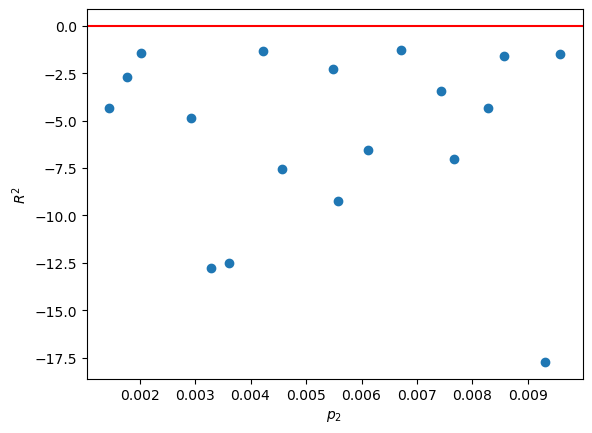

In [68]:
fig, ax = plt.subplots()


#ax.scatter(latent[:,0],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,0],R2.mean(axis=1)[:,1]-R2_out.detach().numpy()[:,1])
ax.scatter(latent[:,1],R2.mean(axis=1)[:,0]-R2_out.detach().numpy()[:,0])
#ax.scatter(latent[:,1],R2.mean(axis=1)[:, 0])
plt.axhline(y=0, color='r', linestyle='-')
#ax.scatter(latent[9:,0],R2_out.detach().numpy()[9:,2])

#ax.scatter(latent,R2.mean(axis=1)[:,1])
#ax.scatter(latent,R2_out.detach().numpy()[:,1])

#ax.scatter(latent,R2.mean(axis=1)[:,2])
#ax.scatter(latent,R2_out.detach().numpy()[:,2])

#plt.errorbar(latent,R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


#ax.scatter(latent,R2.mean(axis=1)[:,1])
#plt.errorbar(latent,R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


#ax.scatter(latent,R2.mean(axis=1)[:,2])
#plt.errorbar(latent,R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])



plt.xlabel('$p_2$')
plt.ylabel('$R^2$')

Text(0, 0.5, '$R^2$')

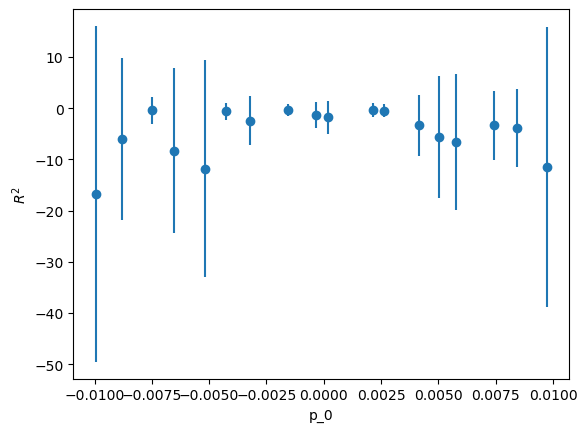

In [69]:

ax.scatter(latent[:,0],R2.mean(axis=1)[:,0])
plt.errorbar(latent[:,0],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])



plt.xlabel('p_0')
plt.ylabel('$R^2$')
#plt.yscale('log')

In [70]:
def proxy(a,y_train,m0,output):
    a=torch.tensor(a)
    res = ((a*m0-y_train)**2).mean(axis=1).detach().numpy()
    return res[output]

In [71]:
X0 = torch.tensor(inputs[0])
Y0 = torch.tensor(outputs[0])[:,None]

inputData_1 = inputs[1]
outputData_1 = outputs[1]

X1 = torch.tensor(inputData_1)
Y1 = torch.tensor(outputData_1)[:,None]
# split original dataset in training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    Y1,
    test_size=0.1,
    random_state=seed
)

emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)

0


In [72]:
#b=np.random.choice(range(X_train.shape[0]),18,replace=False)
p = int(X0.shape[0]*0.05)
n = int(X0.shape[0]/p)
m = 18
MSE = np.zeros((n,m,1))
R2 = np.zeros((n,m,1))
reps = 5
for i in range(n):
    for k in range(m):
        for j in range(reps):
            b=np.random.choice(range(X_train.shape[0]),(k+1)*p,replace=False)
            a=np.random.choice(range(X0.shape[0]),(i+1)*p,replace=False)
            emulator_0 = GPE.ensemble(X0[a,:],Y0[a,:],mean_func="linear",training_iter=500)
            m0 = emulator_0.predict(X_train[b,:])
            y_adjust = torch.tensor(y_train[b] - m0)
            delta_1 = GPE.ensemble(X_train[b,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,k] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2[i,k] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3172062991.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[b] - m0)


0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3172062991.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE[i,k] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/3172062991.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2[i,k] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


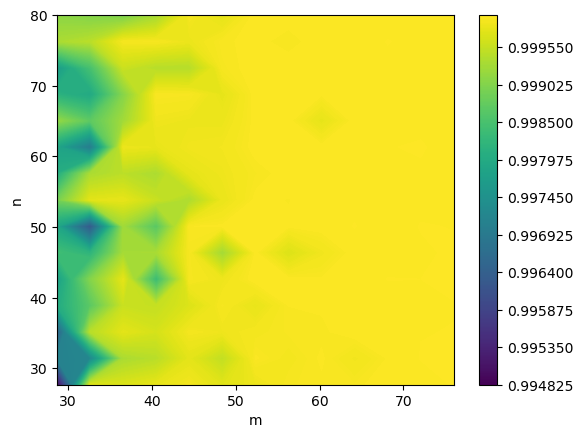

In [73]:
x = np.linspace(9,76,18)

x

y = np.linspace(9,80,20)

y

xx,yy=np.meshgrid(x,y)

xx[1:,1:].shape

level = 5

plt.contourf(xx[level:,level:],yy[level:,level:],R2[level:,level:,0],origin='lower',levels=500)
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()

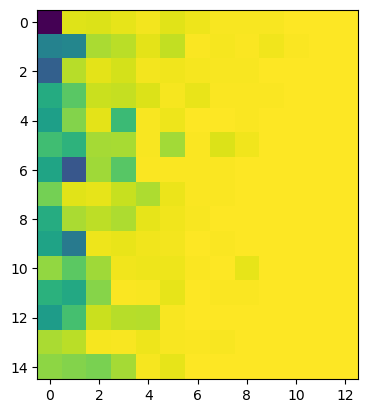

In [74]:
plt.imshow(R2[level:,level:,0])

In [75]:
R2.shape

(20, 18, 1)

In [76]:
#b=np.random.choice(range(X_train.shape[0]),18,replace=False)
p = int(X0.shape[0]*0.05)
n = int(X0.shape[0]/p)
m = 18
MSE_a = np.zeros((n,m,1))
R2_a = np.zeros((n,m,1))
reps = 5
for i in range(n):
    for k in range(m):
        for j in range(reps):
            b=np.random.choice(range(X_train.shape[0]),(k+1)*p,replace=False)
            a=np.random.choice(range(X0.shape[0]),(i+1)*p,replace=False)
            emulator_0 = GPE.ensemble(X0[a,:],Y0[a,:],mean_func="linear",training_iter=500)
            m0 = emulator_0.predict(X_train[b,:])
            a_d=np.zeros(y_train.shape[1])
            for l in range(y_train.shape[1]):
                result = scipy.optimize.minimize(proxy, 1, args=(y_train[b,:],m0,l), method='Nelder-Mead', tol=1e-8)
                print(result.x)
                a_d[l]=result.x

            a_d=torch.tensor(a_d)
            print(a_d)
            
            y_adjust = torch.tensor(y_train[b] - a_d*m0)
            delta_1 = GPE.ensemble(X_train[b,:],y_adjust,mean_func="linear",training_iter=500)
            MSE_a[i,k,:] += np.sqrt(((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
            R2_a[i,k,:] += (1-((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0)/torch.tensor(y_test.var(axis=0))).detach().numpy()/reps

0
[-1.02074016]
tensor([-1.0207], dtype=torch.float64)
0


/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/1148931251.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_adjust = torch.tensor(y_train[b] - a_d*m0)
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/1148931251.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MSE_a[i,k,:] += np.sqrt(((a_d*emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())/reps
/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_17269/1148931251.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than

0
[3.15342835]
tensor([3.1534], dtype=torch.float64)
0
0
[0.73767229]
tensor([0.7377], dtype=torch.float64)
0
0
[2.67306547]
tensor([2.6731], dtype=torch.float64)
0
0
[-0.83070284]
tensor([-0.8307], dtype=torch.float64)
0
0
[1.91899624]
tensor([1.9190], dtype=torch.float64)
0
0
[0.42528002]
tensor([0.4253], dtype=torch.float64)
0
0
[0.47207294]
tensor([0.4721], dtype=torch.float64)
0
0
[-7.87366888]
tensor([-7.8737], dtype=torch.float64)
0
0
[19.39256529]
tensor([19.3926], dtype=torch.float64)
0
0
[5.125288]
tensor([5.1253], dtype=torch.float64)
0
0
[0.35774074]
tensor([0.3577], dtype=torch.float64)
0
0
[-0.30893699]
tensor([-0.3089], dtype=torch.float64)
0
0
[3.4348027]
tensor([3.4348], dtype=torch.float64)
0
0
[1.41085473]
tensor([1.4109], dtype=torch.float64)
0
0
[1.84352636]
tensor([1.8435], dtype=torch.float64)
0
0
[9.66244587]
tensor([9.6624], dtype=torch.float64)
0
0
[1.7759656]
tensor([1.7760], dtype=torch.float64)
0
0
[1.59135898]
tensor([1.5914], dtype=torch.float64)
0
0
[4.3

0
[-1.48240489]
tensor([-1.4824], dtype=torch.float64)
0
0
[-0.69634517]
tensor([-0.6963], dtype=torch.float64)
0
0
[4.33956482]
tensor([4.3396], dtype=torch.float64)
0
0
[11.13732429]
tensor([11.1373], dtype=torch.float64)
0
0
[4.46206604]
tensor([4.4621], dtype=torch.float64)
0
0
[0.94824814]
tensor([0.9482], dtype=torch.float64)
0
0
[4.20752952]
tensor([4.2075], dtype=torch.float64)
0
0
[0.16504773]
tensor([0.1650], dtype=torch.float64)
0
0
[2.88407539]
tensor([2.8841], dtype=torch.float64)
0
0
[5.64803317]
tensor([5.6480], dtype=torch.float64)
0
0
[1.11894599]
tensor([1.1189], dtype=torch.float64)
0
0
[22.91575003]
tensor([22.9158], dtype=torch.float64)
0
0
[-7.39514866]
tensor([-7.3951], dtype=torch.float64)
0
0
[0.07519768]
tensor([0.0752], dtype=torch.float64)
0
0
[3.51455913]
tensor([3.5146], dtype=torch.float64)
0
0
[0.60678831]
tensor([0.6068], dtype=torch.float64)
0
0
[7.72624121]
tensor([7.7262], dtype=torch.float64)
0
0
[7.8612965]
tensor([7.8613], dtype=torch.float64)
0
0

0
[1.91089729]
tensor([1.9109], dtype=torch.float64)
0
0
[13.16873425]
tensor([13.1687], dtype=torch.float64)
0
0
[0.35048187]
tensor([0.3505], dtype=torch.float64)
0
0
[2.34880661]
tensor([2.3488], dtype=torch.float64)
0
0
[8.1494651]
tensor([8.1495], dtype=torch.float64)
0
0
[16.99664791]
tensor([16.9966], dtype=torch.float64)
0
0
[4.63313662]
tensor([4.6331], dtype=torch.float64)
0
0
[4.83394159]
tensor([4.8339], dtype=torch.float64)
0
0
[3.45404921]
tensor([3.4540], dtype=torch.float64)
0
0
[4.92195418]
tensor([4.9220], dtype=torch.float64)
0
0
[1.8962733]
tensor([1.8963], dtype=torch.float64)
0
0
[2.19671237]
tensor([2.1967], dtype=torch.float64)
0
0
[27.11582954]
tensor([27.1158], dtype=torch.float64)
0
0
[6.45779581]
tensor([6.4578], dtype=torch.float64)
0
0
[-30.49143915]
tensor([-30.4914], dtype=torch.float64)
0
0
[11.58849002]
tensor([11.5885], dtype=torch.float64)
0
0
[2.50084]
tensor([2.5008], dtype=torch.float64)
0
0
[3.43953202]
tensor([3.4395], dtype=torch.float64)
0
0
[

[1.63693918]
tensor([1.6369], dtype=torch.float64)
0
0
[6.3547093]
tensor([6.3547], dtype=torch.float64)
0
0
[0.46591562]
tensor([0.4659], dtype=torch.float64)
0
0
[8.85065385]
tensor([8.8507], dtype=torch.float64)
0
0
[5.35570222]
tensor([5.3557], dtype=torch.float64)
0
0
[2.71486173]
tensor([2.7149], dtype=torch.float64)
0
0
[2.13743622]
tensor([2.1374], dtype=torch.float64)
0
0
[2.80395323]
tensor([2.8040], dtype=torch.float64)
0
0
[1.52777413]
tensor([1.5278], dtype=torch.float64)
0
0
[4.19549367]
tensor([4.1955], dtype=torch.float64)
0
0
[15.64766638]
tensor([15.6477], dtype=torch.float64)
0
0
[2.89770786]
tensor([2.8977], dtype=torch.float64)
0
0
[13.07111577]
tensor([13.0711], dtype=torch.float64)
0
0
[-79.99674687]
tensor([-79.9967], dtype=torch.float64)
0
0
[1.56577717]
tensor([1.5658], dtype=torch.float64)
0
0
[7.97575319]
tensor([7.9758], dtype=torch.float64)
0
0
[2.52489834]
tensor([2.5249], dtype=torch.float64)
0
0
[4.0677779]
tensor([4.0678], dtype=torch.float64)
0
0
[14.

0
[16.01086327]
tensor([16.0109], dtype=torch.float64)
0
0
[1.51815015]
tensor([1.5182], dtype=torch.float64)
0
0
[0.66563659]
tensor([0.6656], dtype=torch.float64)
0
0
[1.66307516]
tensor([1.6631], dtype=torch.float64)
0
0
[1.52527984]
tensor([1.5253], dtype=torch.float64)
0
0
[14.07955829]
tensor([14.0796], dtype=torch.float64)
0
0
[2.76569194]
tensor([2.7657], dtype=torch.float64)
0
0
[2.89914438]
tensor([2.8991], dtype=torch.float64)
0
0
[2.66931728]
tensor([2.6693], dtype=torch.float64)
0
0
[1.39086936]
tensor([1.3909], dtype=torch.float64)
0
0
[2.73177489]
tensor([2.7318], dtype=torch.float64)
0
0
[4.05581296]
tensor([4.0558], dtype=torch.float64)
0
0
[5.52040883]
tensor([5.5204], dtype=torch.float64)
0
0
[4.72804363]
tensor([4.7280], dtype=torch.float64)
0
0
[2.81381566]
tensor([2.8138], dtype=torch.float64)
0
0
[9.72211103]
tensor([9.7221], dtype=torch.float64)
0
0
[3.08856826]
tensor([3.0886], dtype=torch.float64)
0
0
[1.4834269]
tensor([1.4834], dtype=torch.float64)
0
0
[7.89

0
[14.51880628]
tensor([14.5188], dtype=torch.float64)
0
0
[2.17498871]
tensor([2.1750], dtype=torch.float64)
0
0
[9.18120214]
tensor([9.1812], dtype=torch.float64)
0
0
[3.94314376]
tensor([3.9431], dtype=torch.float64)
0
0
[2.71778674]
tensor([2.7178], dtype=torch.float64)
0
0
[2.48071358]
tensor([2.4807], dtype=torch.float64)
0
0
[4.45271093]
tensor([4.4527], dtype=torch.float64)
0
0
[8.00953891]
tensor([8.0095], dtype=torch.float64)
0
0
[3.34789245]
tensor([3.3479], dtype=torch.float64)
0
0
[3.4620549]
tensor([3.4621], dtype=torch.float64)
0
0
[6.30267653]
tensor([6.3027], dtype=torch.float64)
0
0
[3.66776174]
tensor([3.6678], dtype=torch.float64)
0
0
[5.89304268]
tensor([5.8930], dtype=torch.float64)
0
0
[2.84198121]
tensor([2.8420], dtype=torch.float64)
0
0
[-15.96263304]
tensor([-15.9626], dtype=torch.float64)
0
0
[16.96638835]
tensor([16.9664], dtype=torch.float64)
0
0
[12.32519978]
tensor([12.3252], dtype=torch.float64)
0
0
[4.59184285]
tensor([4.5918], dtype=torch.float64)
0
0

0
[8.94734181]
tensor([8.9473], dtype=torch.float64)
0
0
[11.22615085]
tensor([11.2262], dtype=torch.float64)
0
0
[6.24874521]
tensor([6.2487], dtype=torch.float64)
0
0
[6.48417079]
tensor([6.4842], dtype=torch.float64)
0
0
[1.67358455]
tensor([1.6736], dtype=torch.float64)
0
0
[9.43283834]
tensor([9.4328], dtype=torch.float64)
0
0
[2.00823693]
tensor([2.0082], dtype=torch.float64)
0
0
[5.31963882]
tensor([5.3196], dtype=torch.float64)
0
0
[4.8581407]
tensor([4.8581], dtype=torch.float64)
0
0
[1.01286076]
tensor([1.0129], dtype=torch.float64)
0
0
[4.07030381]
tensor([4.0703], dtype=torch.float64)
0
0
[11.63008462]
tensor([11.6301], dtype=torch.float64)
0
0
[4.4617488]
tensor([4.4617], dtype=torch.float64)
0
0
[4.16387486]
tensor([4.1639], dtype=torch.float64)
0
0
[1.21853499]
tensor([1.2185], dtype=torch.float64)
0
0
[9.20880896]
tensor([9.2088], dtype=torch.float64)
0
0
[4.48194765]
tensor([4.4819], dtype=torch.float64)
0
0
[3.90863075]
tensor([3.9086], dtype=torch.float64)
0
0
[1.568

0
[1.93172294]
tensor([1.9317], dtype=torch.float64)
0
0
[11.76502532]
tensor([11.7650], dtype=torch.float64)
0
0
[5.41393278]
tensor([5.4139], dtype=torch.float64)
0
0
[2.30575159]
tensor([2.3058], dtype=torch.float64)
0
0
[3.95124103]
tensor([3.9512], dtype=torch.float64)
0
0
[7.8688988]
tensor([7.8689], dtype=torch.float64)
0
0
[5.49630139]
tensor([5.4963], dtype=torch.float64)
0
0
[3.31767551]
tensor([3.3177], dtype=torch.float64)
0
0
[6.76402087]
tensor([6.7640], dtype=torch.float64)
0
0
[0.90687737]
tensor([0.9069], dtype=torch.float64)
0
0
[3.70385427]
tensor([3.7039], dtype=torch.float64)
0
0
[5.62435884]
tensor([5.6244], dtype=torch.float64)
0
0
[4.82539366]
tensor([4.8254], dtype=torch.float64)
0
0
[6.50954865]
tensor([6.5095], dtype=torch.float64)
0
0
[4.87839146]
tensor([4.8784], dtype=torch.float64)
0
0
[3.00638082]
tensor([3.0064], dtype=torch.float64)
0
0
[9.26071981]
tensor([9.2607], dtype=torch.float64)
0
0
[7.60431546]
tensor([7.6043], dtype=torch.float64)
0
0
[11.709

0
[2.19199049]
tensor([2.1920], dtype=torch.float64)
0
0
[4.61864908]
tensor([4.6186], dtype=torch.float64)
0
0
[9.65862281]
tensor([9.6586], dtype=torch.float64)
0
0
[3.00914209]
tensor([3.0091], dtype=torch.float64)
0
0
[2.4908968]
tensor([2.4909], dtype=torch.float64)
0
0
[2.30380813]
tensor([2.3038], dtype=torch.float64)
0
0
[4.05693507]
tensor([4.0569], dtype=torch.float64)
0
0
[3.3261486]
tensor([3.3261], dtype=torch.float64)
0
0
[9.52758799]
tensor([9.5276], dtype=torch.float64)
0
0
[6.62266892]
tensor([6.6227], dtype=torch.float64)
0
0
[6.47268295]
tensor([6.4727], dtype=torch.float64)
0
0
[7.98401244]
tensor([7.9840], dtype=torch.float64)
0
0
[3.75868173]
tensor([3.7587], dtype=torch.float64)
0
0
[3.58149032]
tensor([3.5815], dtype=torch.float64)
0
0
[26.82333624]
tensor([26.8233], dtype=torch.float64)
0
0
[8.15332517]
tensor([8.1533], dtype=torch.float64)
0
0
[1.93302332]
tensor([1.9330], dtype=torch.float64)
0
0
[4.83931978]
tensor([4.8393], dtype=torch.float64)
0
0
[6.19419

0
[1.93447088]
tensor([1.9345], dtype=torch.float64)
0
0
[2.19369473]
tensor([2.1937], dtype=torch.float64)
0
0
[2.80810782]
tensor([2.8081], dtype=torch.float64)
0
0
[8.58850887]
tensor([8.5885], dtype=torch.float64)
0
0
[11.42255588]
tensor([11.4226], dtype=torch.float64)
0
0
[3.74859443]
tensor([3.7486], dtype=torch.float64)
0
0
[2.6404021]
tensor([2.6404], dtype=torch.float64)
0
0
[8.10827267]
tensor([8.1083], dtype=torch.float64)
0
0
[3.29993479]
tensor([3.2999], dtype=torch.float64)
0
0
[3.28524995]
tensor([3.2852], dtype=torch.float64)
0
0
[2.03512469]
tensor([2.0351], dtype=torch.float64)
0
0
[6.44784564]
tensor([6.4478], dtype=torch.float64)
0
0
[1.69320801]
tensor([1.6932], dtype=torch.float64)
0
0
[2.90452563]
tensor([2.9045], dtype=torch.float64)
0
0
[2.64286168]
tensor([2.6429], dtype=torch.float64)
0
0
[8.0965151]
tensor([8.0965], dtype=torch.float64)
0
0
[1.53429928]
tensor([1.5343], dtype=torch.float64)
0
0
[4.67555898]
tensor([4.6756], dtype=torch.float64)
0
0
[3.84521

0
[7.15099369]
tensor([7.1510], dtype=torch.float64)
0
0
[2.02162081]
tensor([2.0216], dtype=torch.float64)
0
0
[4.08432198]
tensor([4.0843], dtype=torch.float64)
0
0
[14.83981175]
tensor([14.8398], dtype=torch.float64)
0
0
[4.88189326]
tensor([4.8819], dtype=torch.float64)
0
0
[9.04628047]
tensor([9.0463], dtype=torch.float64)
0
0
[4.84715727]
tensor([4.8472], dtype=torch.float64)
0
0
[13.12256851]
tensor([13.1226], dtype=torch.float64)
0
0
[16.19551041]
tensor([16.1955], dtype=torch.float64)
0
0
[2.59149074]
tensor([2.5915], dtype=torch.float64)
0
0
[2.70919346]
tensor([2.7092], dtype=torch.float64)
0
0
[1.5232221]
tensor([1.5232], dtype=torch.float64)
0
0
[6.6983665]
tensor([6.6984], dtype=torch.float64)
0
0
[2.30882475]
tensor([2.3088], dtype=torch.float64)
0
0
[4.10354664]
tensor([4.1035], dtype=torch.float64)
0
0
[2.04137714]
tensor([2.0414], dtype=torch.float64)
0
0
[2.8936052]
tensor([2.8936], dtype=torch.float64)
0
0
[3.13410996]
tensor([3.1341], dtype=torch.float64)
0
0
[5.57

0
[3.00925815]
tensor([3.0093], dtype=torch.float64)
0
0
[6.15656274]
tensor([6.1566], dtype=torch.float64)
0
0
[2.03531271]
tensor([2.0353], dtype=torch.float64)
0
0
[11.98336581]
tensor([11.9834], dtype=torch.float64)
0
0
[9.15463444]
tensor([9.1546], dtype=torch.float64)
0
0
[2.41692339]
tensor([2.4169], dtype=torch.float64)
0
0
[3.35234069]
tensor([3.3523], dtype=torch.float64)
0
0
[4.44038536]
tensor([4.4404], dtype=torch.float64)
0
0
[4.05620354]
tensor([4.0562], dtype=torch.float64)
0
0
[2.81288049]
tensor([2.8129], dtype=torch.float64)
0
0
[1.5208233]
tensor([1.5208], dtype=torch.float64)
0
0
[2.19789597]
tensor([2.1979], dtype=torch.float64)
0
0
[8.18469929]
tensor([8.1847], dtype=torch.float64)
0
0
[11.18891477]
tensor([11.1889], dtype=torch.float64)
0
0
[2.1740478]
tensor([2.1740], dtype=torch.float64)
0
0
[13.64825656]
tensor([13.6483], dtype=torch.float64)
0
0
[16.38519749]
tensor([16.3852], dtype=torch.float64)
0
0
[6.3919695]
tensor([6.3920], dtype=torch.float64)
0
0
[12

0
[3.45155012]
tensor([3.4516], dtype=torch.float64)
0
0
[13.20705941]
tensor([13.2071], dtype=torch.float64)
0
0
[4.87846514]
tensor([4.8785], dtype=torch.float64)
0
0
[2.30815806]
tensor([2.3082], dtype=torch.float64)
0
0
[1.66993639]
tensor([1.6699], dtype=torch.float64)
0
0
[4.05801081]
tensor([4.0580], dtype=torch.float64)
0
0
[9.03982117]
tensor([9.0398], dtype=torch.float64)
0
0
[8.18044562]
tensor([8.1804], dtype=torch.float64)
0
0
[11.9133572]
tensor([11.9134], dtype=torch.float64)
0
0
[3.350375]
tensor([3.3504], dtype=torch.float64)
0
0
[7.6017992]
tensor([7.6018], dtype=torch.float64)
0
0
[9.04721717]
tensor([9.0472], dtype=torch.float64)
0
0
[2.63213204]
tensor([2.6321], dtype=torch.float64)
0
0
[8.66403401]
tensor([8.6640], dtype=torch.float64)
0


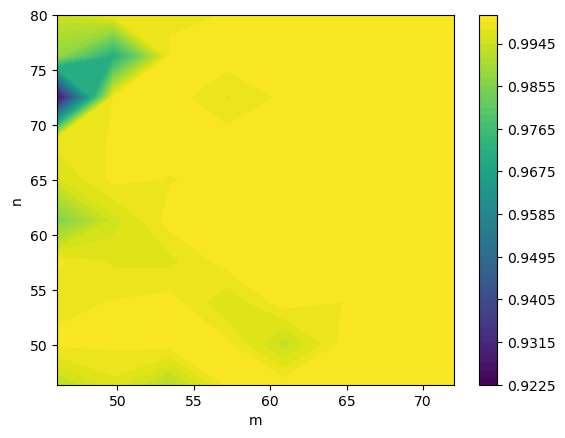

In [77]:
x = np.linspace(9,72,18)

x

y = np.linspace(9,80,20)

y

xx,yy=np.meshgrid(x,y)

xx[1:,1:].shape

level = 10

plt.contourf(xx[level:,level:],yy[level:,level:],R2_a[level:,level:,0],origin='lower',levels=50)
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()

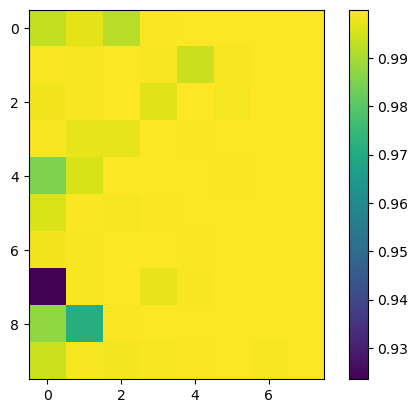

In [78]:
plt.imshow(R2_a[level:,level:,0])
plt.colorbar()

In [79]:
R2_a

array([[[-5.12604199e+00],
        [ 3.10823645e-02],
        [ 7.18222396e-02],
        [ 9.47194377e-01],
        [ 6.53541609e-01],
        [ 9.95031182e-01],
        [ 8.91173933e-01],
        [ 9.99396609e-01],
        [ 9.99884845e-01],
        [ 9.85428288e-01],
        [ 9.99161397e-01],
        [ 9.98952334e-01],
        [ 9.52170926e-01],
        [ 9.98029329e-01],
        [ 9.94838768e-01],
        [ 9.99706151e-01],
        [ 9.99710295e-01],
        [ 9.99961674e-01]],

       [[-1.92288390e+00],
        [-6.96716706e+01],
        [ 4.33547459e-01],
        [ 9.56053698e-01],
        [ 9.87222892e-01],
        [ 9.95994013e-01],
        [ 9.94272513e-01],
        [ 9.81101416e-01],
        [ 9.96181263e-01],
        [ 9.99471022e-01],
        [ 9.98954442e-01],
        [ 9.85242009e-01],
        [ 9.98092767e-01],
        [ 9.97814067e-01],
        [ 9.99540192e-01],
        [ 9.89351922e-01],
        [ 9.99962082e-01],
        [ 9.99522147e-01]],

       [[-1.90455692e+00

In [80]:
18*4

72

In [81]:

ax.scatter(latent[:,1],R2.mean(axis=1)[:,1])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,0],fmt='o',yerr=R2.std(axis=1)[:,0])


ax.scatter(latent[:,1],R2.mean(axis=1)[:,1])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,1],fmt='o',yerr=R2.std(axis=1)[:,1])


ax.scatter(latent[:,1],R2.mean(axis=1)[:,2])
plt.errorbar(latent[:,1],R2.mean(axis=1)[:,2],fmt='o',yerr=R2.std(axis=1)[:,2])


plt.legend(['dif','end','mean'])
plt.xlabel('End Time')
plt.ylabel('$R^2$')
#plt.yscale('log')

IndexError: index 1 is out of bounds for axis 1 with size 1